<a href="https://colab.research.google.com/github/leocassiosilva/computacao-cognitiva/blob/main/vis%C3%A3o_computacional_Pipeline_BootCamp_Atlantico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unzip

In [ ]:
!unzip '/content/drive/MyDrive/BootCamp_Atlantico/dataset.zip' -d '/content/'

unzip:  cannot find or open /content/drive/MyDrive/BootCamp_Atlantico/dataset.zip, /content/drive/MyDrive/BootCamp_Atlantico/dataset.zip.zip or /content/drive/MyDrive/BootCamp_Atlantico/dataset.zip.ZIP.


# Import

In [ ]:
# from tensorflow.keras.applications.resnet50 import preprocess_input
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np
import os
import itertools
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
# from keras.utils import np_utils
# from keras.layers import Input
# from keras.layers.merge import add, concatenate
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D


#Pre-processamento

## Mediana

In [ ]:
path_img = '/content/train/Leocassio/'
path_out = '/content/mediana/train/Leocassio/'
dir_ = os.listdir(path_img)

if not os.path.exists(path_out):
    os.makedirs(path_out)

for img in dir_:
  img_noisy1 = cv2.imread(path_img + img, 0)
  m, n = img_noisy1.shape

  img_new1 = np.zeros([m, n])

  for i in range(1, m-1):
      for j in range(1, n-1):
          temp = [img_noisy1[i-1, j-1],
                  img_noisy1[i-1, j],
                  img_noisy1[i-1, j + 1],
                  img_noisy1[i, j-1],
                  img_noisy1[i, j],
                  img_noisy1[i, j + 1],
                  img_noisy1[i + 1, j-1],
                  img_noisy1[i + 1, j],
                  img_noisy1[i + 1, j + 1]]
          temp = sorted(temp)
          img_new1[i, j] = temp[4]

  img_new1 = img_new1.astype(np.uint8)
  cv2.imwrite(path_out + img, img_new1)

FileNotFoundError: ignored

## Remove BackGround

In [ ]:
!sudo apt install ffmpeg python3.6-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.6-dev is already the newest version (3.6.9-1~18.04ubuntu1.7).
python3.6-dev set to manually installed.
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!pip install backgroundremover

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 57 kB 5.5 MB/s 
     |████████████████████████████████| 47 kB 6.1 MB/s 
     |████████████████████████████████| 2.2 MB 32.1 MB/s 
     |████████████████████████████████| 138 kB 63.2 MB/s 
     |████████████████████████████████| 388 kB 62.3 MB/s 
     |████████████████████████████████| 61 kB 9.1 MB/s 
     |████████████████████████████████| 48 kB 6.4 MB/s 
     |████████████████████████████████| 3.4 MB 44.3 MB/s 
     |████████████████████████████████| 26.9 MB 1.3 MB/s 
     |████████████████████████████████| 3.4 MB 65.2 MB/s 
     |████████████████████████████████| 3.4 MB 42.7 MB/s 
     |████████████████████████████████| 3.4 MB 49.7 MB/s 
     |█████████████████████████

In [ ]:
!backgroundremover -i "/content/train/Renato/IMG_20220715_212545.jpg" -o "output3.png"

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
output3.png


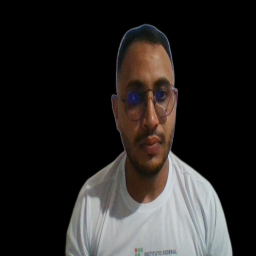

In [ ]:

img_ = cv2.imread('/content/output.png')
resized = cv2.resize(img_, (256,256), interpolation = cv2.INTER_AREA)
cv2_imshow(resized)

## subtract blackhat

In [ ]:
def subtract_blackhat(image_gray):
    """
        Funcao responsavel por realçar uma imagem utilizando a operação de subtração com o filtro blackhat
        Arguments:
          image_gray: np.array -- Uma matriz NumPy que representa a imagem na escala de cinza
                com a forma (num_rows, num_cols, num_channels)
        Return:
          image_enhancement: np.array -- Imagem realçada
    """
    structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25, 25))
    image_processed = cv2.morphologyEx(image_gray, cv2.MORPH_BLACKHAT, structuring_element)
    image_enhancement = cv2.subtract(image_gray, image_processed)
    image_enhancement = cv2.subtract(image_enhancement, image_processed)
    return image_enhancement

In [ ]:
path_img = '/content/train/Leocassio/'
path_out = '/content/backG/train/Leocassio/'
dir_ = os.listdir(path_img)

if not os.path.exists(path_out):
    os.makedirs(path_out)

for k in dir_:
  im = cv2.imread(path_img + k)
  gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  out = subtract_blackhat(gray)

  cv2.imwrite(path_out + k, out)

True

# Dataset

In [ ]:
# Carregar o dataset
def load_dataset(TRAINING_DIR, TEST_DIR, VAL_DIR, im_shape, seed, BATCH_SIZE):
    """
        Funcao responsavel por carregar as imagens no disco

        Arguments:
          TRAINING_DIR: str -- Caminho do dataset de treinamento
          TEST_DIR: str -- Caminho do dataset de teste
          VAL_DIR: str -- Caminho para as imagens de validação
          im_shape: tuple -- Shape das imagens
          seed: int --
          BATCH_SIZE: int -- Controla o número de amostras de treinamento a serem trabalhadas

        Return:
          train_generator: Imagens de treinamento carregadas atraves do metodo generator do Keras
          validation_generator: Imagens de validação carregadas atraves do metodo generator do Keras
          test_generator: Imagens de teste carregadas atraves do metodo generator do Keras
          nb_train_samples: int -- Quantidade de imagens para treinamento
          nb_validation_samples: int -- Quantidade de imagens para validação
          nb_test_samples: int -- Quantidade de imagens para teste
          num_classes: int -- Quantidade de classes
          classes: list -- Lista das classes
    """
    # Dataset SEM Data Augmentation
    data_generator = ImageDataGenerator(rescale=1./255,
        preprocessing_function=preprocess_input)

    # Dataset COM Data Augmentation
    # data_generator = ImageDataGenerator(
    #                          rescale=1./255,    
    #                          rotation_range=1,
    #                          zoom_range=0.08,
    #                          vertical_flip=True,
    #                          horizontal_flip=True,
    #                          preprocessing_function=preprocess_input) 

    val_data_generator = ImageDataGenerator(rescale=1./255,
        preprocessing_function=preprocess_input)

    # Generator para parte train
    train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                         class_mode='categorical', batch_size=BATCH_SIZE,
                                                         subset="training")
    # Generator para parte validação
    validation_generator = val_data_generator.flow_from_directory(VAL_DIR, target_size=im_shape, shuffle=False,
                                                                  seed=seed,
                                                                  class_mode='categorical', batch_size=BATCH_SIZE)

    # Generator para dataset de teste
    test_generator = ImageDataGenerator(rescale=1./255,
        preprocessing_function=preprocess_input)
    
    test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                        class_mode='categorical', batch_size=BATCH_SIZE)

    nb_train_samples = train_generator.samples
    nb_validation_samples = validation_generator.samples
    nb_test_samples = test_generator.samples

    classes = list(train_generator.class_indices.keys())
    print('Classes_train: ' + str(classes))

    classes_val = list(validation_generator.class_indices.keys())
    print('Classes_val: ' + str(classes_val))

    classes_test = list(test_generator.class_indices.keys())
    print('Classes_test: ' + str(classes_test))

    num_classes = len(classes)

    return train_generator, validation_generator, test_generator, nb_train_samples, nb_validation_samples, \
           nb_test_samples, num_classes, classes



# Model

In [ ]:
# Modelo
def make_modelGen_inceptionv3(epochs, BATCH_SIZE,
                              train_generator, validation_generator,
                              nb_train_samples, nb_validation_samples,
                              path_model, num_classes=3, im_shape=(256, 256, 3),
                              layers_trainable=True):
    """
        Funcao que retorna a rede IncerptionV3 pronta pra ser treinada
        Arguments:
          epochs: int -- Quantidade de epochs que sera usada no treinamento
          BATCH_SIZE: int -- Controla o número de amostras de treinamento a serem trabalhadas
          train_generator: Imagens de treinamento carregadas atraves do metodo generator do Keras
          validation_generator: Imagens de validação carregadas atraves do metodo generator do Keras
          nb_train_samples: int -- Quantidade de imagens para treinamento
          nb_validation_samples: int -- Quantidade de imagens para validação
          path_model: str -- Caminho para salvar o modelo
          num_classes: int -- Quantidade de classes do dataset
          im_shape: tuple -- Parametro com o Shape das imagens
          layers_trainable: boolean -- define o atributo trainable
        Return:
    """
    inception = InceptionV3(weights='imagenet', include_top=False, input_shape=im_shape)
    model_name = "inception{}".format(time.time())
    tensorboard = TensorBoard(log_dir="/content/drive/MyDrive/BootCamp_Atlantico/projeto/tensoboard/Inceptionv3/{}".format(model_name))

    if (not (layers_trainable)):
        for layer in inception.layers:
            layer.trainable = False

    model = Sequential()
    model.add(inception)
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy']) # sparse_categorical_accuracy

    earlyStopping = EarlyStopping(monitor='val_loss', patience=30, verbose=0, mode='min')
    mcp_save = keras.callbacks.ModelCheckpoint(filepath=path_model, monitor='val_loss', save_best_only=True, verbose=1)
    reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=30, verbose=1,
                                       epsilon=1e-4,
                                       mode='min')
    model.fit(train_generator, batch_size=BATCH_SIZE, epochs=epochs, validation_data=validation_generator, verbose=1,
              validation_steps=nb_validation_samples // BATCH_SIZE, callbacks=[mcp_save, reduce_lr_loss, earlyStopping
            , tensorboard])
    model.evaluate(validation_generator, batch_size=BATCH_SIZE, verbose=1)

In [ ]:
# Modelo
def make_modelGen(epochs, BATCH_SIZE, num_classes, im_shape, train_generator
                , validation_generator, nb_train_samples, nb_validation_samples, path_model, bloc=4, layer_size=[128, 64, 32, 16], dense_layer=2):
    print('==========================')
    print(f'Rede: {bloc}')
    print(f'layer_size: {layer_size}')
    print('==========================')

    # input_image = Input(shape=(100, 100, 3))

    model_name = "{}-nodes-{}-dense-{}".format(
               layer_size, dense_layer, time.time())
    tensorboard = TensorBoard(log_dir="/content/drive/MyDrive/projeto/tensoboard/gene/{}".format(model_name))
    model = Sequential()
    #print('aqui1\n')
    for i in range(bloc):
        print(layer_size[i])
        model.add(Conv2D(layer_size[i], kernel_size=(3, 3), input_shape=(256, 256, 3)))
        #print('aqui2\n')
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        if i == 0:
            model.add(Dropout(0.1))
        else:
            model.add(Dropout(0.25))
    
    model.add(Flatten())
    for _ in range(dense_layer):
        model.add(Dense(16))
        model.add(Activation('relu'))

    model.add(Dense(3))
    model.add(Activation('softmax'))

    # print(model.summary())

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    

    earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
    mcp_save = keras.callbacks.ModelCheckpoint(filepath=path_model, monitor='val_loss', save_best_only=True, verbose=1)
    reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.05, patience=10, verbose=1,
                            epsilon=1e-4,
                            mode='min')
    model.fit(train_generator, batch_size=BATCH_SIZE, epochs=epochs, validation_data=validation_generator, verbose=1,
            validation_steps=nb_validation_samples // BATCH_SIZE ,callbacks=[mcp_save, tensorboard, reduce_lr_loss, earlyStopping])
    model.evaluate(validation_generator, batch_size=BATCH_SIZE, verbose=1)

# Test

In [ ]:
# Testando o modelo
def test_model(path_model, validation_generator, test_generator):
    """
        Funcao responsavel por testar o modelo

        Arguments:
          path_model: str -- Caminho do modelo salvo na etapa de treinamento
          validation_generator: Imagens de validação carregadas atraves do metodo generator do Keras
          test_generator: Imagens de teste carregadas atraves do metodo generator do Keras

        Return:
          Y_pred: numpy.ndarray -- Todas as predições do modelo
          y_pred: numpy.ndarray -- Pega a predição com a maior confiança
          target_names: list -- Lista das classes
          model: Modelo carregado
    """
    model = load_model(path_model)

    score = model.evaluate_generator(validation_generator)
    print('Val loss:', score[0])
    print('Val accuracy:', score[1])

    score = model.evaluate_generator(test_generator)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    classes = list(validation_generator.class_indices.keys())
    print(f'classes: {classes}')
    Y_pred = model.predict_generator(test_generator)  # , nb_test_samples // BATCH_SIZE, workers=1)
    y_pred = np.argmax(Y_pred, axis=1)
    target_names = classes

    # print(model.summary())

    return Y_pred, y_pred, target_names, model


# plotando a matriz de confusão
def plot_confusion_matrix(path_save, name, cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
        Funcao responsavel por plotar a matriz de confusão

        Arguments:
          path_save: str -- caminho para salvar a imagem
          name: str -- nome da rede
          cm: matriz de confusão
          classes: list -- Lista das classes
          normalize: bool --
          title: str -- Titulo
          cmap: Mapa de cores registrado usado para mapear dados escalares para cores

        Return:
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    plt.savefig(path_save + '/conf_matrix_model_'+ name +'.png')


def classify(img_path, y_true, name, path_toResult, path_model):
    """
        Funcao responsavel salvar as imagens com a legenda da predição do modelo

        Arguments:
          img_path: str -- Caminho para a imagem a ser predita
          y_true: str -- Categoria correta da imagem
          name: str -- Identidade(nome) do arquivo
          path_toResult: str -- Caminho para a pasta que sera salvo a imagem predita
          path_model: str -- Caminho do modelo .h5

        Return:
    """
    img = image.load_img(img_path, target_size=(256, 256))
    img = img.reshape(1, 256, 256, 3)
    img_array = image.img_to_array(img)

    img_batch = np.expand_dims(img_array, axis=0)
    
    #tf.keras.layers.Rescaling(scale=1./255)
    

    img_preprocessed = preprocess_input(img_batch)
    class_names = ['Adriano', 'Leocassio', 'Renato']

    model = load_model(path_model)
    prediction = model.predict(img_preprocessed)

    score = tf.nn.softmax(prediction[0])
    print("classe '{}' com uma confiança de {: .2f}%.".format(
        class_names[np.argmax(score)], 100 * np.max(score)))

    
    if not os.path.exists(path_toResult):
        os.makedirs(path_toResult)
    # Lendo a imagem
    img = cv2.imread(img_path)

    # Padronizando as configurações para escrever na imagem
    font = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = (0, 50)
    bottomLeftCornerOfText_2 = (0, 100)
    fontScale = 2
    fontColor = (0, 255, 0)
    lineType = 3

    cv2.putText(img, 'True: ' + y_true, bottomLeftCornerOfText, font, fontScale, fontColor, lineType)
    
    if y_true == str(class_names[np.argmax(score)]):
        cv2.putText(img, 'Predict: ' + str(class_names[np.argmax(score)]), bottomLeftCornerOfText_2, font,
                    fontScale, fontColor, lineType)
    else:
        fontColor = (0, 0, 255)
        cv2.putText(img, 'Predict: ' + str(class_names[np.argmax(score)]), bottomLeftCornerOfText_2, font,
                    fontScale, fontColor, lineType)
    
    cv2.imwrite(path_toResult + name, img)



# Main

In [ ]:
def main():
    # Alguns parâmetros para leitura do dataset e treinamento do modelo
    TRAINING_DIR = '/content/train'
    TEST_DIR = '/content/test'
    VAL_DIR = '/content/val'

    path_model_incep = '/content/drive/MyDrive/BootCamp_Atlantico/projeto/model_inceptionv3.h5'
    path_model_gen = '/content/drive/MyDrive/BootCamp_Atlantico/projeto/model_gen.h5'
    path_toResult_incept = '/content/drive/MyDrive/BootCamp_Atlantico/projeto/resultado/inceptionv3/'
    path_toResult_gen = '/content/drive/MyDrive/BootCamp_Atlantico/projeto/resultado/gen/'
    path_save = '/content/drive/MyDrive/BootCamp_Atlantico/projeto/'
    name_ = 'inceptionv3'
    name_gen = 'gen'

    im_shape = (256, 256, 3)

    seed = 10
    BATCH_SIZE = 2
    epochs = 60

    # Carregendo o dataset
    print('[INFO]: Load Dataset')
    train_generator, validation_generator, test_generator, nb_train_samples, nb_validation_samples, nb_test_samples \
        , num_classes, classes = load_dataset(TRAINING_DIR, TEST_DIR, VAL_DIR, (256,256), seed, BATCH_SIZE)

    # Treinando
    print('[INFO]: Train InceptionV3')
    #make_modelGen_inceptionv3(epochs, BATCH_SIZE, train_generator, validation_generator, nb_train_samples,
    #                          nb_validation_samples, path_model_incep)
    
    print('[INFO]: Train Gen')
    #make_modelGen(epochs, BATCH_SIZE, num_classes, im_shape, train_generator
    #            , validation_generator, nb_train_samples, nb_validation_samples, path_model_gen)

    # Testando o modelo
    print('[INFO]: Teste model InceptionV3')
    Y_pred_, y_pred_, target_names_, model_ = test_model(path_model_incep, validation_generator, test_generator)
    print('[INFO]: Teste model gen')
    Y_pred, y_pred, target_names, model = test_model(path_model_gen, validation_generator, test_generator)

    # Plotando a matriz de confusão
    print('[INFO]: Plotando a matriz de confusão -- INCEPTIONV3')
    #cm_INCEPT = confusion_matrix(test_generator.classes, y_pred_)
    #plot_confusion_matrix(path_save, name_, cm_INCEPT, target_names, normalize=False, title='Confusion Matrix Model InceptionV3')

    print('[INFO]: Plotando a matriz de confusão -- GEN')
    #cm_gen = confusion_matrix(test_generator.classes, y_pred)
    #plot_confusion_matrix(path_save, name_gen, cm_gen, target_names, normalize=False, title='Confusion Matrix Model Gen')

    # Report
    print('[INFO]: Classification Report Inception V3')
    #print(classification_report(test_generator.classes, y_pred_, target_names=target_names))

    print('[INFO]: Classification Report gen')
    #print(classification_report(test_generator.classes, y_pred, target_names=target_names))

    print('\n[INFO]: Gerando imagens resultado da rede Inception V3\n')
    for root, dirs, files in os.walk(TEST_DIR, topdown=False):
        for name in files:
            y_true = root.split('/')[-1]
            path_img = os.path.join(root, name)
            classify(path_img, y_true, name, path_toResult_incept, path_model_incep)

    print('\n[INFO]: Gerando imagens resultado da rede GEN\n')
    for root, dirs, files in os.walk(TEST_DIR, topdown=False):
        for name in files:
            y_true = root.split('/')[-1]
            path_img = os.path.join(root, name)
            classify(path_img, y_true, name, path_toResult_gen, path_model_gen)

In [ ]:
if __name__ == "__main__":
    main()

[INFO]: Load Dataset
Found 57 images belonging to 3 classes.
Found 9 images belonging to 3 classes.
Found 9 images belonging to 3 classes.
Classes_train: ['Adriano', 'Leocassio', 'Renato']
Classes_val: ['Adriano', 'Leocassio', 'Renato']
Classes_test: ['Adriano', 'Leocassio', 'Renato']
[INFO]: Train InceptionV3
[INFO]: Train Gen
[INFO]: Teste model InceptionV3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.


Val loss: 0.000843042740598321
Val accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.


Test loss: 0.001881344011053443
Test accuracy: 1.0
classes: ['Adriano', 'Leocassio', 'Renato']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


[INFO]: Teste model gen
Val loss: 0.0002617084828671068
Val accuracy: 1.0
Test loss: 0.0002698086609598249
Test accuracy: 1.0
classes: ['Adriano', 'Leocassio', 'Renato']
[INFO]: Plotando a matriz de confusão -- INCEPTIONV3
[INFO]: Plotando a matriz de confusão -- GEN
[INFO]: Classification Report Inception V3
[INFO]: Classification Report gen

[INFO]: Gerando imagens resultado da rede Inception V3



AttributeError: ignored

In [ ]:
model = load_model('/content/drive/MyDrive/BootCamp_Atlantico/projeto/model_inceptionv3.h5')

In [ ]:
class_names = ['Adriano', 'Leocassio', 'Renato']

In [ ]:
test = '/content/Captura de tela de 2021-01-11 14-14-37.png'
image = cv2.imread(test)
img = cv2.resize(image, (256, 256))
img = img.reshape(1, 256, 256, 3)
img = preprocess_input(img)
i = time.time()
pred = model.predict(img)
f = time.time()
index = np.argmax(pred, axis=1)[0]
prediction = class_names[index]
prediction

'Adriano'